## Final Project Submission

Please fill out:
* Student name: George Gachugu Kariuki
* Student pace: full time
* Scheduled project review date/time: 22 March 2024
* Instructor name: Asha Deen
* Blog post URL:

# Title - Microsoft Movies

## Business Overview
Microsoft Studios have are excited to delve into the world of creative arts videos and movie production. To aid the head of Microsoft Movies I ahve created this project that attempts to undertand the movies at the box office with an aim to explore the kind of films that are doing well at the box office. Some of the questions we shall explore and investigate include:
### 1. Genres 
    - What are the best performing genres at the box office?
### 2. Directors - Best performing directors by revenue and volume
    - Who are the best performing directors at the box office?
### 3. Studios - Best performing studios by revenue and volume
    - Which studios are the best performing studios at the box office?
    
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

## Data Understanding
We have two sources of data: a sqlite3 database that contains information on the movies in different tables, and a csv files from imdb.

### Sqlite3 Databases
There are 5 tables in the database - 3 of which we will use in our analysis - Movie basics, Directors and the Movie Ratings tables.
In line with our objective, I joined the 3 tables based on the common feature `movie_id` to form one table - picking only the relevant features avoiding any duplications. These features are the movie_id, original_title	primary_name, runtime_minutes, genres, averagerating and numvotes.
Using the Pandas library, I transformed the table into a Pandas DataFrame for easier manipulation

In [2]:
# Creating a connection object using sqlite3 library
conn = sqlite3.connect("./zippedData/im.db/im.db")

In [3]:
pd.read_sql("SELECT * FROM sqlite_master;", conn).head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [4]:
query = """
    SELECT original_title as title, primary_name AS director, 
        runtime_minutes, genres
    FROM directors
    JOIN persons
        USING (person_id)
    JOIN movie_basics
        USING (movie_id)
    JOIN movie_ratings
        USING (movie_id)
"""
im_df = pd.read_sql(query, conn)
im_df.tail()

,title,director,runtime_minutes,genres
181382,Reversing Roe,Anne Sundberg,99.0,Documentary
181383,The Princess Switch,Mike Rohl,101.0,Romance
181384,The Princess Switch,Mike Rohl,101.0,Romance
181385,Doozy,Richard Squires,70.0,"Animation,Comedy"
181386,Syndebukken: Prosessen mot Harry Lindstrøm,Fredrik Horn Akselsen,NaN,Documentary


In [5]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   title            181387 non-null  object 
 1   director         181387 non-null  object 
 2   runtime_minutes  163584 non-null  float64
 3   genres           180047 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.5+ MB


### CSV Files
The [first csv file]('./zippedData/bom.movie_gross.csv.gz') contains the movies' titles, studios, gross earnings in domestic and foreign currencies, and the year released or produced. This file had 3387 records in it.

The [second csv file]('./zippedData/tmdb.movies.csv.gz') contains the features - genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average and vote_count. This file contained 26517 records in it.

Lastly, we obtain our budgets from the [budgets csv]('./zippedData/tn.movie_budgets.csv.gz') and other data from this dataset. This dataset contained 5782 records with 6 features - id, release date, movie, production_budget, domestic_gross, worldwide_gross.

BOM Data

In [6]:
bom_df = pd.read_csv("./zippedData/bom.movie_gross.csv.gz")
print(bom_df.shape)
bom_df.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


TMDB Data

In [8]:
tmdb_df = pd.read_csv("./zippedData/tmdb.movies.csv.gz", index_col=0)
print(tmdb_df.shape)
tmdb_df.head()

(26517, 9)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


Movie Budgets Data

In [10]:
budgets_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
print(budgets_df.shape)
budgets_df.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Preparation

### Data Cleaning
We drop the features from both bom and imdb that we will not need.

Cleaning the TMDB dataset

In [11]:
# Drop unnecessary columns in tmdb_df
tmdb_df.drop(columns=["genre_ids", "id", "original_language", "original_title"], inplace=True)

In [12]:
tmdb_df.isna().sum()

popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

In [13]:
# Investigating the number of duplicates
tmdb_df.duplicated().sum()

1020

In [14]:
# Dropping the duplicates and confirming that there are no duplicates
tmdb_df.drop_duplicates(inplace=True)
tmdb_df.duplicated().sum()

0

In [15]:
# Check
tmdb_df.shape

(25497, 5)

Cleaning the BOM DataFrame

In [16]:
# Investigating the number of duplicates
bom_df.duplicated().sum()

0

In [17]:
# Investigating the proportion of missing values in each column
bom_df.isna().sum()/ bom_df.shape[0] * 100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [18]:
# The foreign_gross column is missing 39% of it's data. It would be better if we dropped the feature
bom_df.drop(axis=1, columns=["foreign_gross"], inplace=True)

In [19]:
bom_df.isna().sum()/ bom_df.shape[0] * 100

title             0.000000
studio            0.147623
domestic_gross    0.826690
year              0.000000
dtype: float64

In [20]:
# Drop records with missing data in the "studio" column
bom_df.dropna(axis=0, inplace=True)
bom_df.shape

(3356, 4)

In [21]:
# Rename a column
bom_df = bom_df.rename(columns={"domestic_gross":"revenue"})

In [22]:
# Check
bom_df.shape

(3356, 4)

Cleaning the Budgets Dataframe

In [23]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [24]:
# Change the datatypes of the production_budget, domestic gross and worldwide gross features to integers
for col in ['production_budget', 'domestic_gross',
       'worldwide_gross']:
    if budgets_df[col].dtype == 'O':
        budgets_df[col] = budgets_df[col].map(lambda record: record.replace("$", ""))
        budgets_df[col] = budgets_df[col].map(lambda record: record.replace(",", ""))
        budgets_df[col] = budgets_df[col].apply(int)

In [25]:
# Confirming cleaned features are in the correct dtype
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [26]:
# Change the column movie to title
budgets_df = budgets_df.rename(columns={"movie":"title", "production_budget":"budget", "domestic_gross":"revenue"})

# Confirm change of feature name
budgets_df.columns

Index(['id', 'release_date', 'title', 'budget', 'revenue', 'worldwide_gross'], dtype='object')

In [27]:
# Drop features already present in the other dataframes
budgets_df.drop(axis=1, labels=['id', 'release_date', 'worldwide_gross', "revenue"],
               inplace=True)

# Check
budgets_df.shape

(5782, 2)

Cleaning the IM Dataframe

In [28]:
im_df.describe()

,runtime_minutes
count,163584.000000
mean,97.789484
std,194.434689
min,3.000000
25%,84.000000
50%,94.000000
75%,107.000000
max,51420.000000


In [29]:
# Investigating the proportion of missing values per feature
print(im_df.shape)
im_df.isna().sum()/im_df.shape[0] * 100

(181387, 4)


title              0.000000
director           0.000000
runtime_minutes    9.814926
genres             0.738752
dtype: float64

In [30]:
# Through investigation we can see that the runtime_minutes missing values account for less than 10% of the dataset.
# We can drop these records because attempting to fill in the values with the mean could falsify our findings
im_df.dropna(axis=0, inplace=True)
im_df.shape
im_df.isna().sum()

title              0
director           0
runtime_minutes    0
genres             0
dtype: int64

In [31]:
# Drop duplicates
im_df.duplicated().sum() # 86218

im_df.drop_duplicates(subset=['title', 'runtime_minutes', 
                              'genres',], keep='first', inplace=True)

im_df.duplicated().sum()

0

In [32]:
# There seems to be an outlier in the im_df dataset where a movie has a runtime of 51420 minutes which translates to 857 hours
# This could have been an error while inputting data or this relates to a Series instead of a movie

# Assuming the average length of a very long normal movie is less than 5 hours
im_df = im_df[im_df["runtime_minutes"] <= 300]

In [33]:
im_df.shape
im_df.describe()

,runtime_minutes
count,65256.000000
mean,93.504153
std,22.699702
min,3.000000
25%,81.000000
50%,91.000000
75%,104.000000
max,300.000000


### Data Merging

After cleaning both data sets csvs and databases, we can now merge them on their common feature - title

Merge the BOM Dataset with the TMDB dataset

In [35]:
# Merging the bom datasets
bomtmdb = pd.merge(left=bom_df, right=tmdb_df, how="inner", on="title")

Merge the BOMTMDB Dataset with the Budgets dataset

In [36]:
secondary_df = pd.merge(left=bomtmdb, right=budgets_df, how="inner", on="title")

Merge the Secondary Dataset with the IM dataset

In [37]:
movies_df = pd.merge(secondary_df, im_df, how='inner', on='title')

Previewing the combined datasets

In [38]:
print(movies_df.shape)
movies_df.head()

(1506, 12)


,title,studio,revenue,year,popularity,release_date,vote_average,vote_count,budget,director,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,2010,24.445,2010-06-17,7.7,8340,200000000,Lee Unkrich,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,2010,27.920,2010-07-16,8.3,22186,160000000,Christopher Nolan,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,2010,15.041,2010-05-16,6.1,3843,165000000,Mike Mitchell,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,20.340,2010-06-23,6.0,4909,68000000,David Slade,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,2010,28.515,2010-05-07,6.8,12368,170000000,Jon Favreau,124.0,"Action,Adventure,Sci-Fi"


## Data Exploration

#### Feature Engineering

Two important features I consider necessary in the dataset is the profit column which is 
1. Profit
- This is the difference between revenues and budget
2. Month Produced
- This will help us identify in which month were movies produced

In [39]:
movies_df["profit"] = movies_df["revenue"] - movies_df["budget"]
movies_df["month"] = movies_df["release_date"].map(lambda date: date[5:7])

In [40]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1505
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1506 non-null   object 
 1   studio           1506 non-null   object 
 2   revenue          1506 non-null   float64
 3   year             1506 non-null   int64  
 4   popularity       1506 non-null   float64
 5   release_date     1506 non-null   object 
 6   vote_average     1506 non-null   float64
 7   vote_count       1506 non-null   int64  
 8   budget           1506 non-null   int64  
 9   director         1506 non-null   object 
 10  runtime_minutes  1506 non-null   float64
 11  genres           1506 non-null   object 
 12  profit           1506 non-null   float64
 13  month            1506 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 176.5+ KB


In [41]:
movies_df.describe()

,revenue,year,popularity,vote_average,vote_count,budget,runtime_minutes,profit
count,1.506000e+03,1506.000000,1506.000000,1506.000000,1506.000000,1.506000e+03,1506.000000,1.506000e+03
mean,6.111259e+07,2013.859894,12.301907,6.289841,2069.926959,4.574091e+07,106.807437,1.537168e+07
std,8.547073e+07,2.556659,8.254737,1.051528,2844.836864,5.549494e+07,19.177751,6.264574e+07
min,8.000000e+02,2010.000000,0.600000,0.000000,1.000000,5.000000e+04,3.000000,-2.019000e+08
25%,6.800000e+06,2012.000000,7.851250,5.800000,301.250000,1.000000e+07,94.000000,-1.145000e+07
50%,3.505000e+07,2014.000000,10.740500,6.300000,1008.500000,2.500000e+07,105.000000,8.000000e+05
75%,7.617500e+07,2016.000000,15.434750,6.900000,2569.000000,5.590000e+07,118.000000,2.935000e+07
max,7.001000e+08,2018.000000,80.773000,10.000000,22186.000000,4.106000e+08,180.000000,5.001000e+08


#### Helper Visualisation Functions

In [42]:
def plot_bar(data, title, xlabel, ylabel,figsize=(8, 6), x=10, y=10):
    """
    This function creates a bar chart.
    """
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    x = data.index
    y = data.values
    ax.bar(x=x, height=y)
    plt.show();
    
    
def plot_hist(data, title, xlabel, ylabel, bins=20, figsize=(8, 6)):
    """
    This function creates a bar chart.
    """
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.hist(x=data, bins=20)
    plt.show();
    
def plot_scatter(x, y, title, xlabel, ylabel, alpha=0.2, figsize=(8, 6)):
    """
    This function quickly plots a scatter plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.scatter(x=movies_df["vote_count"], y=movies_df['revenue'], alpha=0.2)
    plt.show();

In [43]:
def generate_financials(feature, basis="count"):
    
    """
    This method takes one feature as an argument.
    It first gets the top 10 items in the feature based on count.
    It uses the mean to aggregate the dataframe based on the feature.
    It returns two figures showing the 
    1. Revenue against Budget per feature
    2. Profit Margin per feature
    """
    
    # Value counts
    if basis == "vote count":
        feature_counts = movies_df.groupby(feature).mean()["vote_count"].sort_values(ascending=False)[:10]
    else:
        feature_counts = movies_df[feature].value_counts(ascending = False)[:10]
    
    # Top 10 items based on count
    top_10_feature_indices = list(feature_counts.index)

    # Prepare a new dataframe based on the Top 10 items per feature
    profit_margin = movies_df[movies_df[feature].isin(top_10_feature_indices)].groupby(feature).mean().reset_index()

    # Creating key columns - Profit Margin
    profit_margin["profit_percent"] = round(((profit_margin["revenue"] - profit_margin["budget"])
                                             / profit_margin["revenue"]) * 100, 2)
    
    # The Matplotlib Figure
    fig, (ax1, ax2) = plt.subplots(figsize=(16, 8), ncols=2)
    plt.xticks(rotation=45, ha='right')
    
    width = 0.4
    
    values = np.arange(len(top_10_feature_indices))
    
    ax1.bar(x=values, height=profit_margin['revenue'], label="Revenue", width=width)
    ax1.bar(x=values+width, height=profit_margin['budget'], label="Budget", width=width)
    ax1.set_title('Revenues V Budgets per {}' .format(feature.capitalize()))
    ax1.set_ylabel('Amount in Dollars in 1e8')
    ax1.set_xlabel(feature.capitalize())
    ax1.set_xticks(np.arange(len(top_10_feature_indices)))
    ax1.set_xticklabels(top_10_feature_indices, rotation=45, ha='right')
    ax1.legend()
    
    ax2.bar(x=profit_margin[feature], height=profit_margin['profit_percent'])
    ax2.set_title('Profit Margin per {}' .format(feature.capitalize()))
    ax2.set_ylabel('Percentage')
    ax2.set_xlabel(feature.capitalize())

#### Exploring Movie Runtimes

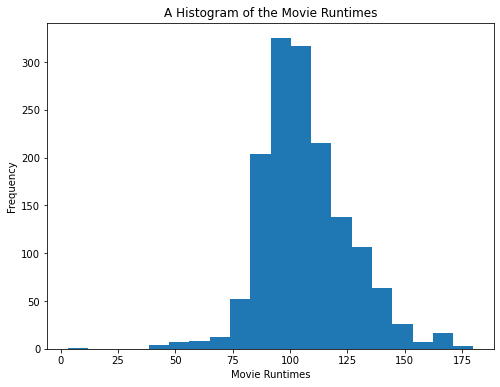

In [45]:
# movies_df.runtime_minutes.plot(kind="hist", bins=20)
data = movies_df.runtime_minutes
plot_hist(data=data, 
          title="A Histogram of the Movie Runtimes",
         xlabel="Movie Runtimes",
         ylabel="Frequency");